In [1]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import geopandas as gpd
import numpy as np
from tqdm import tqdm_notebook
from shapely.geometry import Point, LineString
import os

from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium
import geoplot


data_path = '/home/fterroso/data/'

## Read ministry study OD

Read dataframe from notebook 6a

In [2]:
gt_od_df = pd.read_csv(os.path.join('data','global_gt_july_2017_od.csv'))

In [3]:
gt_od_df.head()

,CPROV_o,CPROV_d,total_trips,norm_trips,PROV_o,PROV_d,distance,pob_o,tw_n_trips,tw_n_trips_norm
0,1,2,186.866,0.000466,Araba/Álava,Albacete,449.475826,331549.0,0.0,0.000000
1,3,2,82287.488,0.057087,Alacant/Alicante,Albacete,128.697310,1858683.0,4.0,0.058824
2,4,2,3247.865,0.009363,Almería,Albacete,183.628143,716820.0,0.0,0.000000
3,5,2,471.007,0.001318,Ávila,Albacete,319.635676,157640.0,0.0,0.000000
4,6,2,541.672,0.001992,Badajoz,Albacete,361.923358,673559.0,0.0,0.000000


## Read provinces geojson

In [4]:
province_gdf = gpd.read_file(os.path.join('data', 'provinces_with_code.geojson'), encoding='utf-8').to_crs({'init': 'epsg:25830'})
province_gdf['CODEUNIT'] = province_gdf['CODEUNIT'].astype(float)
province_gdf.head()

,NATCODE,NAMEUNIT,CODEUNIT,geometry
0,34104600000,València/Valencia,46.0,(POLYGON ((653037.6610938488 4429500.236400451...
1,34084500000,Toledo,45.0,"POLYGON ((294238.4652867644 4416957.42816667, ..."
2,34024400000,Teruel,44.0,"POLYGON ((765333.0112961649 4512252.350615062,..."
3,34094300000,Tarragona,43.0,(POLYGON ((813560.4348489635 4504876.753000001...
4,34074200000,Soria,42.0,"POLYGON ((583890.5889343297 4603311.305096235,..."


In [5]:
province_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
NATCODE     52 non-null object
NAMEUNIT    52 non-null object
CODEUNIT    52 non-null float64
geometry    52 non-null object
dtypes: float64(1), object(3)
memory usage: 1.7+ KB


In [6]:
trips_per_prov_df = gt_od_df.groupby('CPROV_o').sum()['total_trips'].to_frame()
trips_per_prov_df = trips_per_prov_df.reset_index()

In [7]:
trips_per_prov_df.head()

,CPROV_o,total_trips
0,1,400050.242
1,2,301304.581
2,3,1422423.888
3,4,346571.581
4,5,357009.578


In [8]:
trips_per_prov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
CPROV_o        49 non-null int64
total_trips    49 non-null float64
dtypes: float64(1), int64(1)
memory usage: 864.0 bytes


In [9]:
gt_prov_stats_gdf = pd.merge(province_gdf, trips_per_prov_df.reset_index(), left_on='CODEUNIT', right_on='CPROV_o')

In [10]:
gt_prov_stats_gdf.head()

,NATCODE,NAMEUNIT,CODEUNIT,geometry,index,CPROV_o,total_trips
0,34104600000,València/Valencia,46.0,(POLYGON ((653037.6610938488 4429500.236400451...,42,46,1183576.215
1,34084500000,Toledo,45.0,"POLYGON ((294238.4652867644 4416957.42816667, ...",41,45,1143743.994
2,34024400000,Teruel,44.0,"POLYGON ((765333.0112961649 4512252.350615062,...",40,44,179096.048
3,34094300000,Tarragona,43.0,(POLYGON ((813560.4348489635 4504876.753000001...,39,43,1006199.818
4,34074200000,Soria,42.0,"POLYGON ((583890.5889343297 4603311.305096235,...",38,42,129130.792


In [13]:
gt_prov_stats_gdf['total_trips'].sum()

27631413.369

In [11]:
gt_prov_stats_gdf.describe()

,CODEUNIT,index,CPROV_o,total_trips
count,49.000000,49.00000,49.000000,4.900000e+01
mean,26.489796,24.00000,26.489796,5.639064e+05
std,15.226242,14.28869,15.226242,5.587636e+05
min,1.000000,0.00000,1.000000,2.697455e+04
25%,14.000000,12.00000,14.000000,2.636871e+05
50%,26.000000,24.00000,26.000000,3.854625e+05
75%,40.000000,36.00000,40.000000,6.161825e+05
max,52.000000,48.00000,52.000000,3.224166e+06


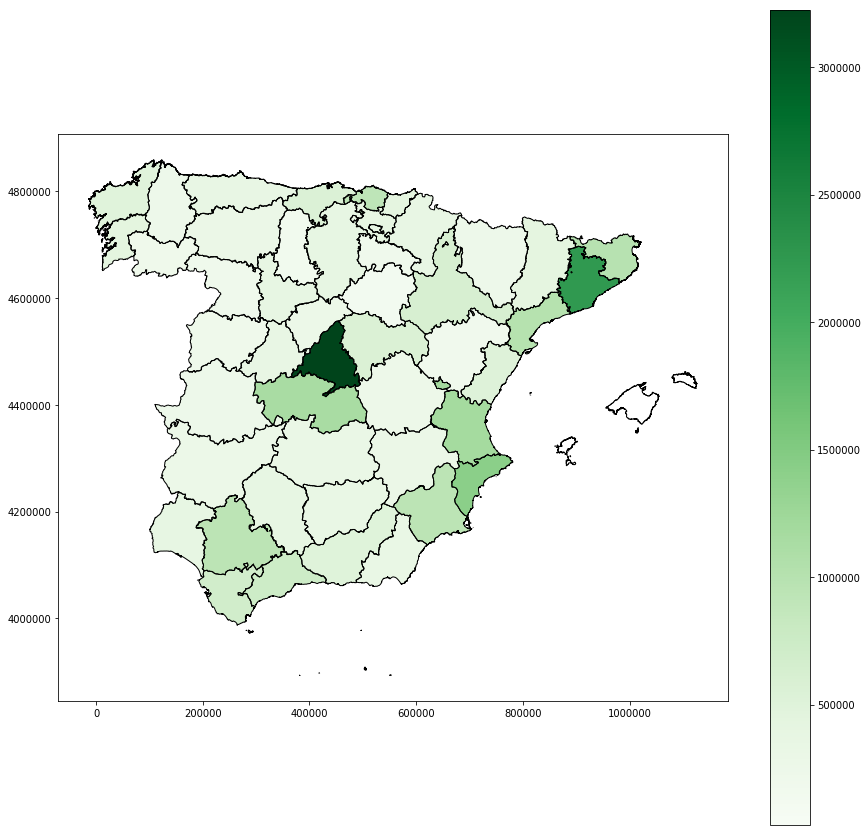

In [12]:
ax=gt_prov_stats_gdf.plot(figsize=(15,15), column='total_trips', legend=True, cmap='Greens');
province_gdf.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax); 
plt.savefig(os.path.join('figs','gt_trips_geo_dist.png'))